In [165]:
import dtw
import pandas
import numpy as np
from matplotlib import pyplot as plt

### URC数据集
Ｍ为训练集条数，Ｋ为测试集条数，Ｎ为序列长度

- train_series：训练数据集，每一行一个序列，为Ｍ×Ｎ的矩阵
- train_serise_labels：训练数据集标签，为Ｍ×１的列向量
- test_series：测试数据集，每一行一个序列，为Ｋ×Ｎ的矩阵
- test_series_labels：测试数据集标签，为Ｋ×１的列向量

In [166]:
def get_data(data_name):
    '''
    获取数据
    paras：data_name(数据名)
    return：train_series（训练数据集），train_series_labels（训练数据集标签），test_series（测试数据集），test_series_labels（测试数据集标签）
    '''
    train = pandas.read_csv(r'../data/'+ data_name + r'/'+ data_name + r'_TRAIN.tsv', sep='\t').values[:, :]
    train_series = train[:, 1:]
    train_series_labels = train[:, 0]

    test = pandas.read_csv(r'../data/'+ data_name + r'/'+ data_name + r'_TEST.tsv', sep='\t').values[:, :]
    test_series = test[:, 1:]
    test_series_labels = test[:, 0]
    
    return train_series, train_series_labels, test_series, test_series_labels

### K近邻算法

In [167]:
class K_nearest_neighor():
    
    K = 1 # 初始为最近邻
    train_series = [] # 训练数据
    train_series_labels = [] # 训练数据标签
    dist_lambda = lambda x, y: np.abs(x - y) # DTW判据，初始化为欧几里得距离
    
    def __init__(self, train_series, train_series_labels, K=1,  dist_lambda=lambda x, y: np.abs(x - y)):
        
        self.K = K
        self.train_series = train_series
        self.train_series_labels = train_series_labels
        self.dist_lambda = dist_lambda
    
    
    def predict(self, test_seris):
        
        predict_labels = [] #预测标签
        
        for test_series_signal in test_series:
            t_dis = [] # 每一个序列与所有训练样本的相似度
            
            for train_series_signal in train_series:
                # DTW计算序列相似度
                dis, _, _, _ = dtw.accelerated_dtw(test_series_signal.reshape(-1,1),
                                                   train_series_signal.reshape(-1,1), 
                                                   dist=self.dist_lambda)
                t_dis.append(dis)
            
            # 与测试样本最相近的Ｋ个训练样本
            nearest_series_labels = np.array(train_series_labels[np.argpartition(t_dis, self.K)[:self.K]]).astype(int)
            # 分类类别
            preditc_labels_signal = np.argmax(np.bincount(nearest_series_labels))
            predict_labels.append(preditc_labels_signal)
            
        return predict_labels

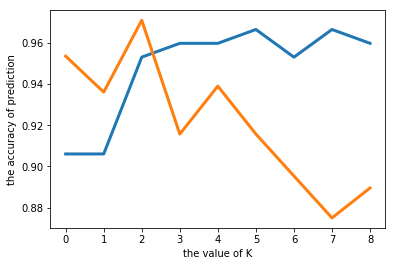

In [169]:
# 所有数据名
data_names = ["SmoothSubspace", "Chinatown"]
# 不同的数据在不同的K值下的精度
accuracies = []

for d in data_names:
    
    accuracy = [] # 同种数据在不同的K值下的精度数组
   
    train_series, train_series_labels, test_series, test_series_labels = get_data(d) # 获取数据
    
    # 不同的K值预测
    for k in range(1, 10):
        my_knn = K_nearest_neighor(train_series=train_series, 
                                   train_series_labels=train_series_labels, 
                                   K=k)
                # 预测标签
        predict_labels = my_knn.predict(test_series)
        # 精度计算
        accuracy.append(np.mean(np.array(predict_labels) == test_series_labels))
    # 作图
    plt.ylabel("the accuracy of prediction")
    plt.xlabel("the value of K")
    plt.plot(accuracy, linewidth=3)
    
    accuracies.append(accuracy)
plt.show()